In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree, write_volume
from cryofib.napari_utils import napari_add_group

## View n5 datasets

In [2]:
postprocess_path = Path("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_postprocess.n5")
f_em = z5py.File(postprocess_path, "r")

OSError: [Errno 30] Read-only file system: '/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_postprocess.n5'

In [ ]:
print_key_tree(f_em)

## Read volumes

In [ ]:
roi = np.s_[:]
em = read_volume(f_em, "input/raw", roi)


In [ ]:
segmentation_keys = ["segmentation/extra", "segmentation/extra_all", "segmentation/extra_renumbered", "segmentation/extra_corrected"]
segmentation_keys = ["segmentation/extra_renumbered", "segmentation/extra_corrected"]
# segmentation_keys = ["segmentation/extra_renumbered"]

In [ ]:
segmentations = [read_volume(f_em, key, roi).astype(np.uint32) for key in segmentation_keys]

In [ ]:
boundaries = read_volume(f_em, "boundaries/instance_boundaries", roi)

In [19]:
low_int = read_volume(f_em, "boundaries/low_intensity", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume boundaries/low_intensity from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_postprocess.n5
Read volume with shape (1350, 1506, 1647), data type float64


## Open raw in napari

In [7]:
v = napari.Viewer()

In [8]:
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7efb245bb0a0>

In [9]:
for key, segm in zip(segmentation_keys, segmentations):
    v.add_labels(segm, name=key)

In [18]:
v.add_labels(boundaries, name="boundaries")

<Labels layer 'boundaries' at 0x7efb0c085c60>

In [23]:
v.add_labels(low_int > 0.99, name="boundaries_mask")

<Labels layer 'boundaries_mask' at 0x7efae9e29570>

In [22]:
v.add_image(low_int, name="boundaries1")

<Image layer 'boundaries1' at 0x7efae9e2afb0>

In [10]:
segm = segmentations[1]

In [11]:
np.max(segm)

76

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 

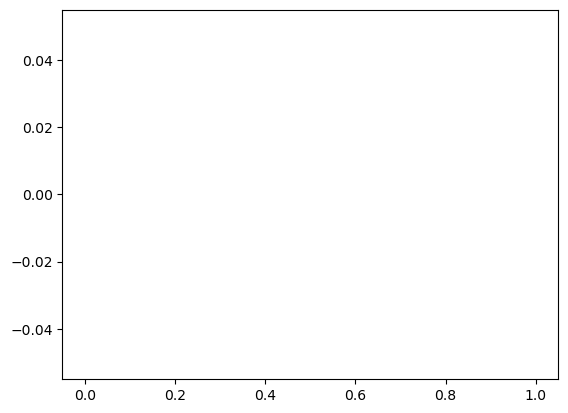

In [12]:
plt.hist(em[segm == 10].flatten(), bins=100)

In [13]:
mask = (segm == 10).astype(int)
v.add_labels(mask, name="mask")

<Labels layer 'mask' at 0x7efb245bb3d0>

In [14]:
np.nonzero(mask)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [15]:
segm

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 